# C'est quoi le mieux entre jeter deux dés deux fois et choisir la paire dont la somme est la plus faible et jeter 3 dés et choisir les deux plus petits dés et les sommer ?

## Jeter deux fois deux dés : 

- On peut déjà associer chaque dé à une variable aléatoire : $D_1, D_2, D_3, D_4 \sim U\{1,2,3,4,5,6\}$. On a donc $P(D_i=k)=\frac{1}{6} ; \forall i \in \{1,2,3,4\}, \forall k \in \{1, 2, 3, 4, 5, 6\}$

On peut ensuite construire deux variables aléatoires corréspondant à chaque somme de paire de dés : $S_1 = D_1 + D_2 ; S_2 = D_3 + D_4$. Et on peut maintenant trouver "à la voix" leurs probas correspondantes.

- On remarque que comme **les jetés de $D_1$ et $D_2$ sont indépendents** on a que $P(D_1=k \cup D_2 = l) = P(D_1 = k)*P(D_2=l)=(\frac{1}{6})^2= \frac{1}{36}$

> En raisonnant de la même façon on a donc $P(S_1=2)=P(S_1=12)=\frac{1}{36} ; P(S_1=3)=P(S_1=11)=\frac{2}{36} ; P(S_1=4)=P(S_1=10)=\frac{3}{36} ; P(S_1=5)=P(S_1=9)=\frac{4}{36} ; P(S_1=6)=P(S_1=8)=\frac{5}{36} ; P(S_1=7) = \frac{6}{36}$ et on a exactement les mêmes probas pour $S_2$ la somme des deux autres dés.

- Maintenant on veut trouver le minimum de $S_1$ et $S_2$ dont on connait les lois. On peut alors se demander la probabilité que le minimum des deux sommes soit égal à $k$ et raisonner à partir de ça : 

Si le minimum est égal à 8 cela veut dire que la somme 1 et égale à 8 et que l'autre est plus grande que 8 ou inversement. On a donc $S_1=8$ et $S_2 = 8, 9, 10, 11, 12$ ou inversemment (**ATTENTION** : si on fait ça on compte deux fois le cas $S_1=8$ et $S_2=8$). D'où $P(min(S_1, S_2)=8)=P(S_1=8)*P(S_2 \ge 8) + P(S_2=8)*P(S_1 \ge 8) - P(S_1=8)P(S_2=8)= \frac{5}{36} * (\frac{5}{36} + \frac{4}{36} + \frac{3}{36} + \frac{2}{36} + \frac{1}{36}) + \frac{5}{36} * (\frac{5}{36} + \frac{4}{36} + \frac{3}{36} + \frac{2}{36} + \frac{1}{36}) - \frac{5}{36} * \frac{5}{36} = \frac{125}{1296}$ 


> En faisant pareil pour les autres on a : $P(min(S_1, S_2)=2)= 71/1296 ; P(min(S_1, S_2)=3)= 17/162 ; P(min(S_1, S_2)=4)= 7/48 ; P(min(S_1, S_2)=5)= 14/81 ; P(min(S_1, S_2)=6)= 235/1296 ; P(min(S_1, S_2)=7)= 1/6 ; P(min(S_1, S_2)=8)= 125/1296 ; P(min(S_1, S_2)=9)= 4/81 ; P(min(S_1, S_2)=10)= 1/48 ; P(min(S_1, S_2)=11)= 1/162 ; P(min(S_1, S_2)=12)= 1/1296$

- On peut désormais faire la sommes des valeurs possibles fois leurs probas pour trouver une **moyenne de 5.628086419753086** (c.f le code ci dessous).





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
#à chaque valeurs de k, on associe la probabilité que la somme des dés soit égale à k
proba_somme={}
for k in range(2,7):
    proba_somme[k]=(k-1)/36
    proba_somme[14-k]=(k-1)/36
proba_somme[7]=1/6
print("{valeurs de la somme : proba associée}\n", proba_somme)

s=0
for key in proba_somme:
    s+=proba_somme[key]
print(s)

#à chaque valeurs de k, on associe la probabilité que le minimum des somme des dés soit égal à k
proba_min={}
for k in range(2, 13):
    s=0
    for i in range(k, 13):
        s+=proba_somme[i]
    proba_min[k]=2*proba_somme[k]*s - proba_somme[k]**2
print("{valeurs du min : proba associée}\n", proba_min)

#on calcule la moyenne du minimum
Somme_Moyenne=0
for key in proba_min:
    Somme_Moyenne+=key*proba_min[key]
print(float(Somme_Moyenne))







{valeurs de la somme : proba associée}
 {2: 1/36, 12: 1/36, 3: 1/18, 11: 1/18, 4: 1/12, 10: 1/12, 5: 1/9, 9: 1/9, 6: 5/36, 8: 5/36, 7: 1/6}
1
{valeurs du min : proba associée}
 {2: 71/1296, 3: 17/162, 4: 7/48, 5: 14/81, 6: 235/1296, 7: 1/6, 8: 125/1296, 9: 4/81, 10: 1/48, 11: 1/162, 12: 1/1296}
5.628086419753086


### Simulation 

On peut vérifier ça en simulant des dés : 

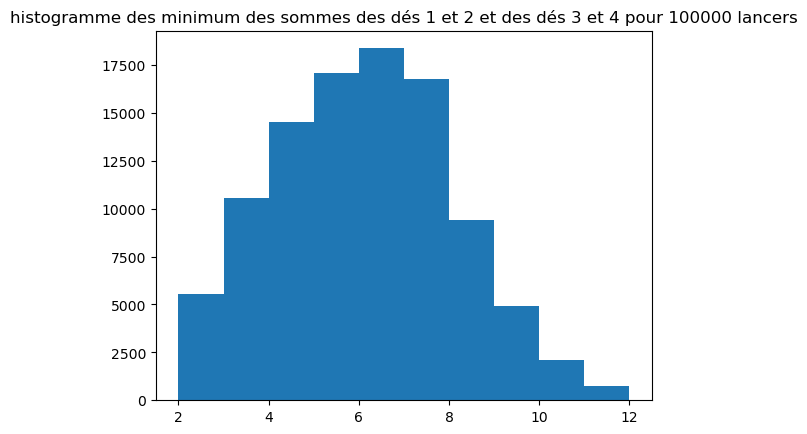

en simulant 100000 lancer on trouve une moyenne de 5.62447 pour le minimum des sommes des dés 1 et 2 et des dés 3 et 4


In [22]:
n=100000 #nombre de lancers
D_1=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 1
D_2=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 2
D_3=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 3
D_4=[random.randint(1,6) for i in range(n)]#on simule les jétés du dé 4

S_1=np.add(D_1, D_2)#on simule la somme des dés 1 et 2
S_2=np.add(D_3,D_4)#on simule la somme des dés 3 et 4
M_1=np.minimum(S_1,S_2)#on simule le minimum des sommes des dés 1 et 2 et des dés 3 et 4
moyenne=np.mean(M_1)#on calcule la moyenne du minimum
#on fait un histogramme des moyennes
plt.hist(M_1, bins=range(2,13))
plt.title(f"histogramme des minimum des sommes des dés 1 et 2 et des dés 3 et 4 pour {n} lancers")
plt.show()


print(f"en simulant {n} lancer on trouve une moyenne de {moyenne} pour le minimum des sommes des dés 1 et 2 et des dés 3 et 4")

## Jeter 3 dés et ne garder que les deux plus faibles :

- Comme avant on modélise trois dés par les mêmes variables aléatoires $D_1, D_2, D_3$. Et on veut trouver la valeur moyenne si on prend les deux plus petits et qu'on les sommes. 

- On commence par prendre le plus petit des trois et on crée $M_1 = min(D_1, D_2, D_3)$. On peut trouver sa loi. 

On peut essayer de trouver la probabilité que le plus petit dé soit plus grand que 4 : pour cela il faut que chaque dé soit plus grand que 4. D'où $P(M_1\ge 4) = P(D_1\ge 4)*P(D_2 \ge 4)*P(D_3 \ge 4)=\frac{3}{6}*\frac{3}{6}*\frac{3}{6}=\frac{1}{8}$. Pareillement on trouve que la probabilité que le dé le plus petit soit plus grand que 5 et de $(\frac{2}{6})^3=\frac{1}{27}$. Et comme être égal à 4 c'est comme être plus grand que 4(inclus) mais pas que 5 - c'est à dire $P(M_1=4)=P(4\le M_1< 5)$ - On a donc que $P(M_1 = 4) = P(4\le M_1< 5) = P(M_1 \ge 4 \cap M_1< 5) = P(M_1 \ge 4)*P(M_1< 5) = P(M_1 \ge 4)*(1 - (P(M_1\ge 5))=\frac{1}{8}*(1-\frac{1}{27})=13/108$
  




In [ ]:
#on chercher la probabilité que le plus petit de 3 dé soit plus grand que k
probaminplusgrand={}

for k in range(1, 7):
    probaminplusgrand[k]=((6-(k-1))/6)**3
print("{valeurs du min : proba associée}\n", probaminplusgrand)
probaminplusgrand[7]=0


probamin={}
probamin[6]=probaminplusgrand[6]


s=0
for key in probamin:
    s+=probamin[key]
print(s)


{valeurs du min : proba associée}
 {1: 1, 2: 125/216, 3: 8/27, 4: 1/8, 5: 1/27, 6: 1/216}
{valeurs du min : proba associée}
 {1: 91/216, 2: 2375/5832, 3: 7/27, 4: 13/108, 5: 215/5832, 6: 1/216}
911/729
